## Hugging Face Datasets

> Hugging Face生态系统中的三个核心库：`Transformers`、`Datasets`和`Tokenizers`。


安装相关库：
```bash
pip install transformers datasets
```

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

### 1. 列出数据集

In [2]:
import datasets
import huggingface_hub

In [3]:
# 列出Hugging Face中的数据集
# datasets.list_datasets()

all_datasets = huggingface_hub.list_datasets(search="wikipedia")

In [4]:
all_datasets

<generator object HfApi.list_datasets at 0x12f71c1f0>

In [5]:
count = 0
for item in all_datasets:
    count += 1
print("总共搜索到{}个数据集".format(count))

总共搜索到862个数据集


In [6]:
type(item)

huggingface_hub.hf_api.DatasetInfo

### 2. 加载HuggingFace中的数据：load_dataset
- 我们使用这个数据作为load测试：https://huggingface.co/datasets/dair-ai/emotion

In [7]:
dataset = datasets.load_dataset("dair-ai/emotion", trust_remote_code=False)

不传递`trust_remote_code`会出一个警告，警告是因为：   
> 这个数据集包含了一些自定义代码，这些代码需要在加载数据集时执行以确保数据集的正确加载。

In [8]:
# 查看这个数据对象：类似Python字典，每个键对应不同的数据集分割。
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [9]:
# 查看其有的key
dataset.keys()

dict_keys(['train', 'validation', 'test'])

In [10]:
# 我们访问一下训练的数据集
ds_train = dataset["train"]
ds_train

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [11]:
type(ds_train)

datasets.arrow_dataset.Dataset

In [12]:
# 查看训练数据的长度
len(ds_train)

16000

In [13]:
# 访问其中的数据
ds_train[-2:]

{'text': ['i feel like this was such a rude comment and im glad that t',
  'i know a lot but i feel so stupid because i can not portray it'],
 'label': [3, 0]}

In [14]:
print(type(ds_train[-1]))
print(ds_train[-1])

<class 'dict'>
{'text': 'i know a lot but i feel so stupid because i can not portray it', 'label': 0}


In [15]:
# 查看Dataset对象的features属性，可以看到labels数字对应的是什么label
ds_train.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

### 3. Datasets数据转为pandas.DataFrame

In [16]:
# set_format的type类型有：[None, 'numpy', 'torch', 'tensorflow', 'pandas', 'arrow', 'jax']
dataset.set_format("pandas")

In [17]:
# 获取train的DataFrame
df_train = dataset["train"][:]

In [18]:
type(df_train)

pandas.core.frame.DataFrame

In [19]:
# 查看前面5条
df_train[:5]

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [20]:
dataset["train"].features["label"].int2str([0, 1, 2, 3, 3, 2, 1])

['sadness', 'joy', 'love', 'anger', 'anger', 'love', 'joy']

In [21]:
df_train["label"]

0        0
1        0
2        3
3        2
4        3
        ..
15995    0
15996    0
15997    1
15998    3
15999    0
Name: label, Length: 16000, dtype: int64

In [22]:
dataset["train"].features["label"].int2str(df_train["label"][:5])

['sadness', 'sadness', 'anger', 'love', 'anger']

In [23]:
# 给df_train增加一列
df_train["Label Name"] = dataset["train"].features["label"].int2str(df_train["label"])

In [24]:
df_train.head()

,text,label,Label Name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


### 4. 查看数据分布

In [25]:
# 根据标签值进行统计个数
df_train["Label Name"].value_counts(ascending=False)

Label Name
joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64

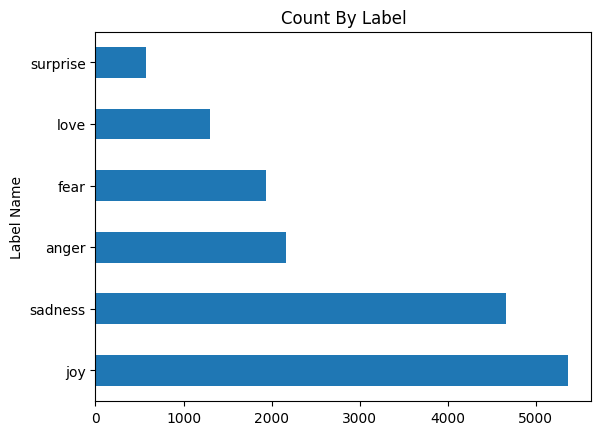

In [26]:
# 画图展示
df_train["Label Name"].value_counts(ascending=False).plot.barh()
plt.title("Count By Label")
plt.show()

In [27]:
count_by_label = df_train["Label Name"].value_counts(ascending=False)

In [28]:
count_by_label

Label Name
joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64

In [29]:
# 查看类型
type(count_by_label)

pandas.core.series.Series

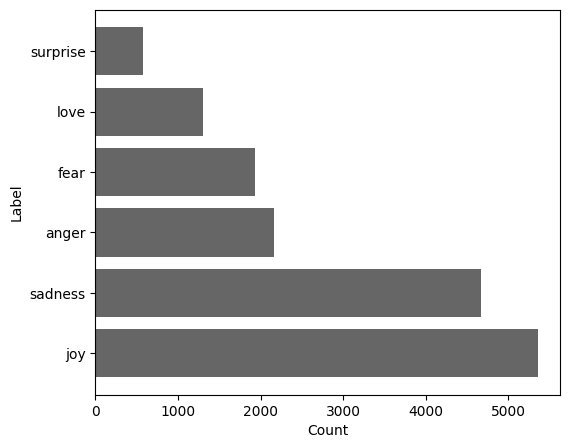

In [30]:
# 画图展示
fig = plt.figure(figsize=(6, 5))
plt.barh(count_by_label.index, count_by_label.values, color="#666")
plt.xlabel("Count")
plt.ylabel("Label")
plt.show()

### 5. 展示数据中文本的长度

In [31]:
df_train.head()

,text,label,Label Name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [32]:
# 添加一列为长度
df_train["Words Count"] = df_train["text"].str.split().apply(len)

In [33]:
df_train.head()

,text,label,Label Name,Words Count
0,i didnt feel humiliated,0,sadness,4
1,i can go from feeling so hopeless to so damned...,0,sadness,21
2,im grabbing a minute to post i feel greedy wrong,3,anger,10
3,i am ever feeling nostalgic about the fireplac...,2,love,18
4,i am feeling grouchy,3,anger,4


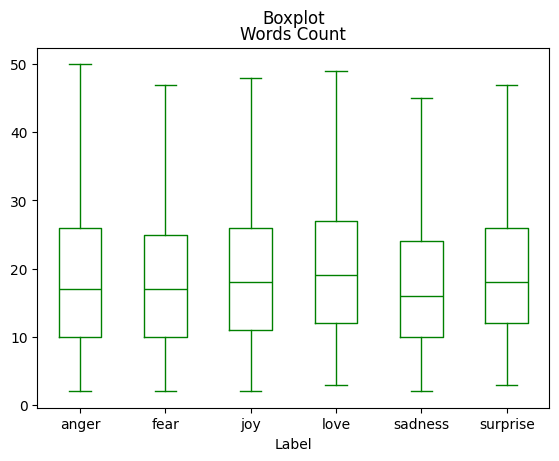

In [34]:
# 图形展示：箱体图
df_train.boxplot("Words Count", by="Label Name", grid=False, showfliers=False, color="green")
plt.suptitle("Boxplot")
plt.xlabel("Label")
plt.show()

### 6. 重置数据集的Format

In [35]:
dataset.reset_format()

In [36]:
type(dataset["train"][:])

dict